In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from itertools import *
import re


import matplotlib

plt.style.use('seaborn-whitegrid')

from collections import defaultdict

import seaborn as sns
import os
%matplotlib inline  

In [30]:
experiments = [
    # Enumeration only.
    '../jobs/05-02-2019/ec_learner_enum_20',
    '../jobs/05-02-2019/ec_learner_enum_60',
    '../jobs/05-02-2019/ec_learner_enum_120',
    '../jobs/05-02-2019/ec_learner_enum_300',
    '../jobs/05-03-2019/ec_learner_enum_600',    
]

In [31]:
# For enumeration only
logStats = defaultdict(dict)
for experiment in experiments:
    experiment_name = experiment.split('/')[-1]
    with open(experiment) as f:
        lines = f.readlines()
    
    # Metrics.
    batch_size = 0
    batch_hits = []
    hit_tasks, miss_tasks = [], []
    
    for line in lines:
        if line.startswith('Hits'):
            hits, batch_size = line.split()[1].split("/")
            hits, batch_size = int(hits), int(batch_size)
            total = batch_hits[-1] if len(batch_hits) > 0 else 0
            batch_hits.append(hits + total) # Cumulative batch hits
    logStats[experiment_name]['batch_hits'] = batch_hits 
    logStats[experiment_name]['batch_size'] = batch_size
    

In [34]:
for experiment_name in logStats:
    print(experiment_name)
    print logStats[experiment_name]['batch_hits']
    print(len(logStats[experiment_name]['batch_hits']))

ec_learner_enum_20
[7, 16, 22, 29, 34, 39, 45, 50, 55, 59, 65, 70, 73, 76, 79, 85, 89, 95, 100, 105, 112, 119, 120, 124, 126, 130, 135, 140, 143, 146, 151, 152, 157, 161, 165, 168, 171, 173, 176, 177, 178, 178, 181, 183, 185, 186, 187, 192, 194, 195, 197, 200, 204, 204, 206, 210, 211, 214, 215, 216, 219, 221, 222, 224, 225, 228, 231, 232, 234, 235, 238, 241, 241, 241, 243, 243, 245, 249, 249, 250, 253, 257, 259, 262, 268, 270, 271, 275, 278, 280, 282, 284, 285, 286, 289, 290, 290, 291, 291, 293, 295, 295, 296, 296, 297, 300, 300, 302, 303, 303, 305, 308, 308, 309, 309, 309, 310, 311, 311, 313, 313, 314, 315, 317, 318, 318, 321, 324, 326, 328, 329, 330, 330, 332, 334, 334, 335, 337, 339, 339, 339, 340, 340, 341, 341, 342, 342, 343, 343, 344]
150
ec_learner_enum_300
[10, 20, 29, 39, 49, 58, 67, 75, 85, 93, 103, 113, 121, 130, 139, 149, 159, 168, 177, 186, 196, 206, 212, 222, 230, 238, 246, 254, 260, 267, 276, 284, 293, 302, 310, 318, 328, 336, 345, 352, 362, 366, 376, 385, 393, 398, 406,

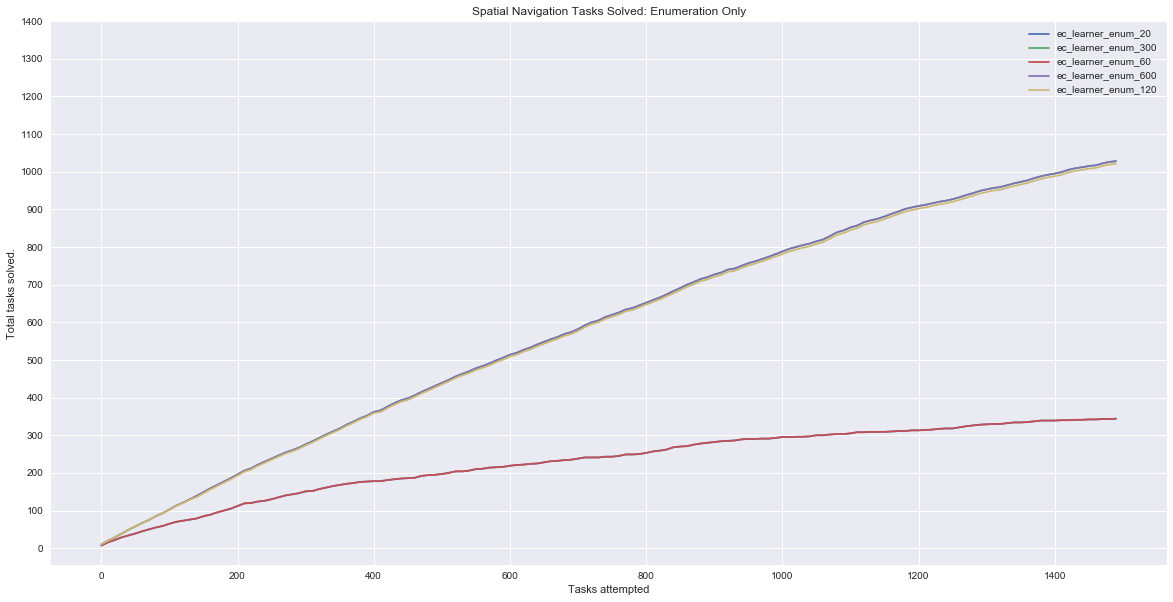

In [36]:
# Plot the enumeration batch hits.
fig, ax = plt.subplots(figsize=(20, 10))
for experiment_name in logStats:
    batch_hits, batch_size = logStats[experiment_name]['batch_hits'], logStats[experiment_name]['batch_size']
    ax.plot([batch_size * i for i in range(len(batch_hits))], batch_hits, label=experiment_name)

ax.legend()
ax.set_title("Spatial Navigation Tasks Solved: Enumeration Only")
ax.set_ylabel('Total tasks solved.')
ax.set_xlabel('Tasks attempted')
# ax.set_xticks(range(20))
ax.set_yticks(range(0, 1500, 100))
plt.show()